In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import datasets 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

In [105]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


In [106]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,class_family
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2


In [107]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'class_family'],
      dtype='object')

In [108]:
prices_df = df[(df['ocean_proximity'] == 'NEAR BAY')]

In [109]:
prices_df = prices_df.groupby(["population","latitude","longitude"], as_index=False)["median_income"].mean()
prices_df.head()


,population,latitude,longitude,median_income
0,8,37.39,-122.06,3.7500
1,13,37.50,-122.14,15.0001
2,13,37.79,-122.50,15.0001
3,18,37.81,-122.29,0.4999
4,19,38.00,-122.49,7.7197


In [110]:
X = prices_df[['latitude','longitude']]
y = prices_df['median_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


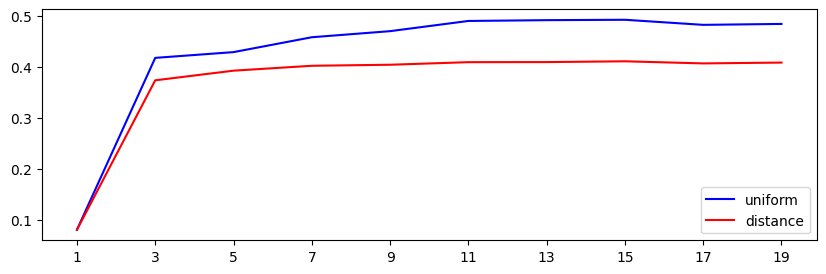

In [111]:
uniform  = []
distance = []
r = range (1,21,2)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()


In [112]:
pd.DataFrame({"k" : r, "uniform" : uniform, "distance" : distance})


,k,uniform,distance
0,1,0.080750,0.080750
1,3,0.417307,0.373362
2,5,0.428567,0.392242
3,7,0.457687,0.401831
4,9,0.469605,0.403854
5,11,0.489574,0.408886
6,13,0.491138,0.409051
7,15,0.491884,0.410592
8,17,0.481942,0.406478
9,19,0.483754,0.408093


In [113]:
#A way of shuffling the training data set -cross-validation.
#GridSearchCV function _combines both the ability to define the no of splits and iterate through various hyperparameters.
params = {'n_neighbors':range(1,21,2),'weights':['uniform','distance']}

model = GridSearchCV(KNeighborsRegressor(), params, cv=5)
model.fit(X_train.values,y_train.values)
model.best_params_


{'n_neighbors': 7, 'weights': 'uniform'}

In [114]:
model.score(X_test.values,y_test.values)


0.45768709805076635

In [115]:
def price(description,lat,lon):
    features = [[lat,lon]]
    print("{:30s} -> {:5.0f}k ".format(description,float(model.predict(features))))

# Examples
price('Oxford Circus, London', 51.515276, -0.142038)
price('Harrods (B. Road), London', 51.499814, -0.163366)
price('Peak District, National Park', 53.328508, -1.783416)


Oxford Circus, London          ->     5k 
Harrods (B. Road), London      ->     5k 
Peak District, National Park   ->     5k 


In [116]:
#House Type by Location and Price

In [117]:
types_df = df.groupby(["latitude","longitude","ocean_proximity"], as_index=False)["median_income"].mean()
types_df.head()


,latitude,longitude,ocean_proximity,median_income
0,32.54,-117.04,NEAR OCEAN,1.2667
1,32.55,-117.09,NEAR OCEAN,3.9583
2,32.55,-117.06,NEAR OCEAN,1.4384
3,32.55,-117.04,NEAR OCEAN,1.6348
4,32.56,-117.12,NEAR OCEAN,2.9286


In [118]:
params = {'n_neighbors':range(1,21,2),'weights':['uniform','distance']}

X = types_df[['latitude','longitude','median_income']]
y = types_df['ocean_proximity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = GridSearchCV(KNeighborsClassifier(), params, cv=5)
model.fit(X_train.values,y_train.values)
model.best_params_


/home/tanisha/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'n_neighbors': 1, 'weights': 'uniform'}

In [119]:
model.score(X_test.values,y_test.values)


0.9237611181702668

In [120]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy:' , metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.9189961880559085


In [121]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy:' , metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.9110546378653113


In [122]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy:' , metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.9021601016518425


In [ ]:
##SVM -SVR

In [146]:
X = df.median_income
y = df.median_house_value
X.shape, y.shape

((20640,), (20640,))

In [149]:
X[: 5]

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [150]:
y[: 10]

0    452600
1    358500
2    352100
3    341300
4    342200
5    269700
6    299200
7    241400
8    226700
9    261100
Name: median_house_value, dtype: int64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [154]:
#x = df['median_income']
#y = df['median_house_value']

#x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)